This code performs data augmentation on the OPD images of the five classes.

The minority classes are augmented to balance the dataset.

The minority class are Monocytes, PBMC, Granulocytes.

The augmented images are saved in the 'Augmented Data images' folder.

In [15]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torchvision import transforms
from PIL import Image


Load the OPD images of the five classes.

In [12]:
SW620_OPD = np.load(r'C:\Users\edendotan\PycharmProjects\DL_cours_project\Data\SW620_OPD.npy')
SW480_OPD_1 = np.load(r'C:\Users\edendotan\PycharmProjects\DL_cours_project\Data\SW480_OPD_1.npy')
SW480_OPD_2 = np.load(r'C:\Users\edendotan\PycharmProjects\DL_cours_project\Data\SW480_OPD_2.npy')
SW480_OPD = np.concatenate((SW480_OPD_1, SW480_OPD_2), axis=0)
Monocytes_OPD = np.load(r'C:\Users\edendotan\PycharmProjects\DL_cours_project\Data\MNC_OPD_old.npy')
PBMC_OPD = np.load(r'C:\Users\edendotan\PycharmProjects\DL_cours_project\Data\PBMC_OPD.npy')
Granulocytes_OPD = np.load(r'C:\Users\edendotan\PycharmProjects\DL_cours_project\Data\GRC_OPD.npy') 

image_data = {
    'SW620': SW620_OPD,
    'SW480': SW480_OPD,
    'Monocytes': Monocytes_OPD,
    'PBMC': PBMC_OPD,
    'Granulocytes': Granulocytes_OPD
}

Define the augmentation transforms and functions to augment the images.

Original data shape for Monocytes: (53, 256, 256)
Augmented data shape for Monocytes: (159, 256, 256)


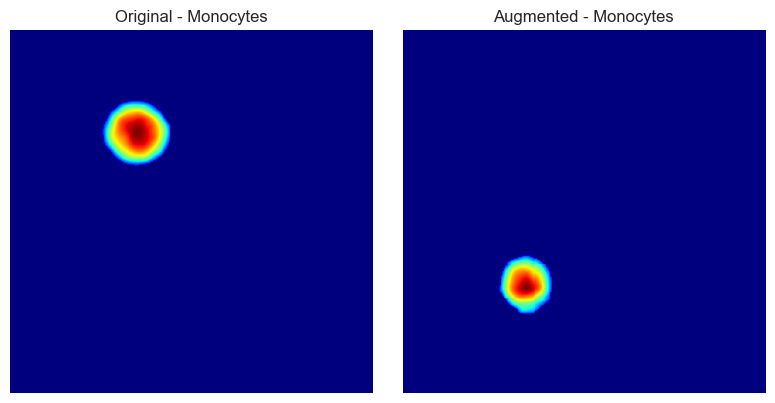

Original data shape for PBMC: (195, 256, 256)
Augmented data shape for PBMC: (585, 256, 256)


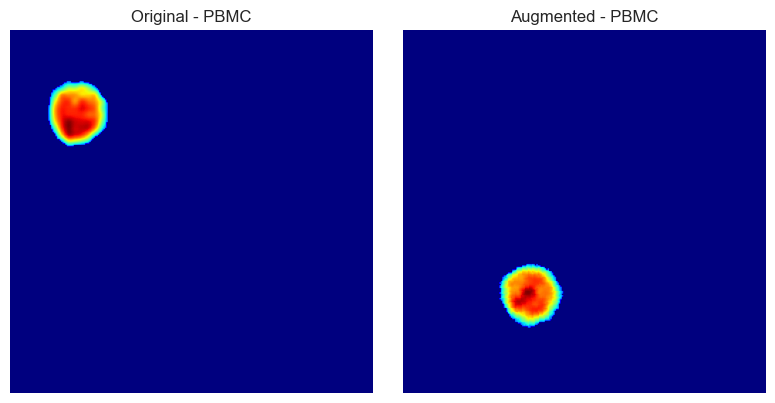

Original data shape for Granulocytes: (142, 256, 346)
Augmented data shape for Granulocytes: (426, 256, 346)


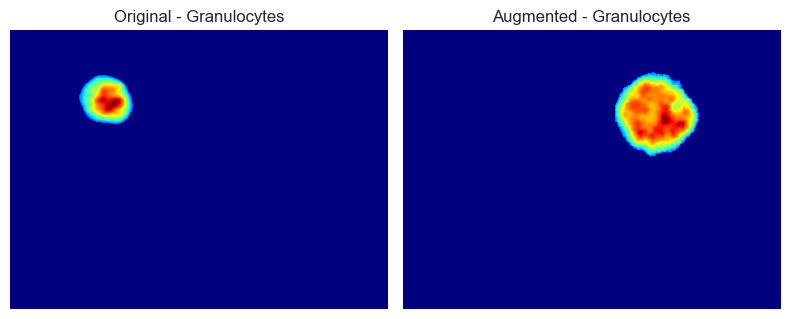

Augmentation complete.


In [13]:
minority_classes = ['Monocytes', 'PBMC', 'Granulocytes']

augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.Grayscale(num_output_channels=1)
])

def numpy_to_tensor(img):
    return torch.from_numpy(img).unsqueeze(0).float() 

def tensor_to_numpy(tensor_img):
    return tensor_img.squeeze(0).numpy()

def augment_images(image_array, num_augmentations=3):
    augmented_images = []
    
    for img in image_array:
        img_tensor = numpy_to_tensor(img) 
        
        for _ in range(num_augmentations):
            augmented_img = augmentation_transforms(img_tensor)  
            augmented_images.append(tensor_to_numpy(augmented_img)) 
    
    return np.stack(augmented_images, axis=0)

def plot_images(original_img, augmented_img, title):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    axes[0].imshow(original_img, cmap='jet')
    axes[0].set_title(f"Original - {title}")
    axes[0].axis('off')
    
    axes[1].imshow(augmented_img, cmap='jet')
    axes[1].set_title(f"Augmented - {title}")
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

for key in minority_classes:
    original_data = image_data[key]
    augmented_data = augment_images(original_data)
    
    print(f"Original data shape for {key}: {original_data.shape}")
    print(f"Augmented data shape for {key}: {augmented_data.shape}")
    
    plot_images(original_data[3], augmented_data[3], title=key)
    
    image_data[key] = np.concatenate([original_data, augmented_data], axis=0)

print("Augmentation complete.")

In [14]:
for cell_type, images in image_data.items():
    num_images = len(images)
    print(f'Number of images for {cell_type}: {num_images}')

Number of images for SW620: 731
Number of images for SW480: 958
Number of images for Monocytes: 212
Number of images for PBMC: 780
Number of images for Granulocytes: 568


save the augmented images in the 'Augmented Data images' folder.

In [16]:
def create_dir_if_not_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)


def split_data(images, train_size=0.7, val_size=0.15):
    train_data, temp_data = train_test_split(images, train_size=train_size, random_state=42)
    val_data, test_data = train_test_split(temp_data, test_size=val_size / (val_size + (1 - train_size)),
                                           random_state=42)
    return train_data, val_data, test_data

def save_images_to_folder(images, class_name, split_name, output_dir, target_size=(256, 256)):
    folder_path = os.path.join(output_dir, split_name, class_name)
    create_dir_if_not_exists(folder_path)

    for idx, img in enumerate(images):
        plt.imshow(img, cmap='jet')
        plt.axis('off')

        plt.savefig('temp_image.png', bbox_inches='tight', pad_inches=0)  
        plt.close()

        img_pil = Image.open('temp_image.png').convert("RGB") 
        img_pil = img_pil.resize(target_size, Image.Resampling.LANCZOS)
        img_pil.save(os.path.join(folder_path, f'{class_name}_{idx + 1}.png'))


def save_dataset_to_images(image_data, output_dir='Augmented Data images', target_size=(256, 256)):
    splits = ['train', 'val', 'test']

    for class_name, images in image_data.items():
        train_images, val_images, test_images = split_data(images)

        # Save train, val, test images in the respective folders with resizing
        save_images_to_folder(train_images, class_name, 'train', output_dir, target_size)
        save_images_to_folder(val_images, class_name, 'val', output_dir, target_size)
        save_images_to_folder(test_images, class_name, 'test', output_dir, target_size)

save_dataset_to_images(image_data)

